# Logistic Regression

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
df = pd.read_csv(r'https://raw.githubusercontent.com/MarcoCalbucci/DataAnalytics/main/PredictiveModeling/Classification/Examples/SocialNetworkAds_LogisticRegression/Social_Network_Ads.csv')
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [ ]:
X = df[['Age', 'EstimatedSalary']].values
y = df[['Purchased']].values

## Plotting data

In [37]:
X_not_purchased = df.loc[df['Purchased']==0, ['Age', 'EstimatedSalary']].values
X_purchased = df.loc[df['Purchased']==1, ['Age', 'EstimatedSalary']].values

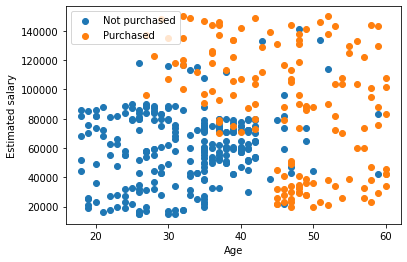

In [39]:
plt.scatter(X_not_purchased[:,0], X_not_purchased[:,1], label='Not purchased')
plt.scatter(X_purchased[:,0], X_purchased[:,1], label='Purchased')
plt.xlabel('Age')
plt.ylabel('Estimated salary')
plt.legend()
plt.show()

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print(X_train)

In [ ]:
print(y_train)

In [ ]:
print(X_test)

In [ ]:
print(y_test)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

In [ ]:
print(X_test)

## Training the Logistic Regression model on the Training set

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

## Predicting a new result

In [ ]:
print(classifier.predict(sc.transform([[30, 87000]])))

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)